<img src="https://github.com/Unidata/MetPy/raw/main/docs/_static/metpy_150x150.png" width=150 alt="MetPy logo"></img>
<img src="https://github.com/Unidata/MetPy/raw/main/docs/_static/unidata_150x150.png" width=150 alt="Unidata logo"></img>

# MetPy Tutorial - Making a Skew-T!
---

## Obtain upper air data

Upper air observations are generally reported as a plain text file in a tabular format that represents the down sampled raw data transmitted by the rawinsonde. Data are reported an mandatory levels and at levels of significant change. An example of sounding data may look like this:

```
-----------------------------------------------------------------------------
   PRES   HGHT   TEMP   DWPT   RELH   MIXR   DRCT   SKNT   THTA   THTE   THTV
    hPa     m      C      C      %    g/kg    deg   knot     K      K      K 
-----------------------------------------------------------------------------
 1000.0    270                                                               
  991.0    345   -0.3   -2.8     83   3.15      0      0  273.6  282.3  274.1
  984.0    403   10.2   -7.8     27   2.17    327      4  284.7  291.1  285.0
  963.0    581   11.8   -9.2     22   1.99    226     17  288.0  294.1  288.4
  959.7    610   11.6   -9.4     22   1.96    210     19  288.1  294.1  288.5
  ```
  
Data are available to download from the [University of Wyoming archive](http://weather.uwyo.edu/upperair/sounding.html), the [Iowa State archive](https://mesonet.agron.iastate.edu/archive/raob/), and the [Integrated Global Radiosonde Archive (IGRA)](https://www.ncdc.noaa.gov/data-access/weather-balloon/integrated-global-radiosonde-archive). **There is no need to download data manually.** We can use the siphon library (also developed at Unidata) to request and download these data. Be sure to checkout the [documentation](https://unidata.github.io/siphon/latest/api/index.html) on all of siphon's capabilities.

---
## Imports

In [1]:
from datetime import datetime
import os
os.environ['TEST_DATA_DIR']="/tmp" # for metpy to grab data on the jupyterhub
os.environ['MPLCONFIGDIR']="/tmp" # for matplotlib on jupyterhub

import matplotlib.pyplot as plt
import metpy.calc as mpcalc

from metpy.plots import SkewT
from metpy.units import units, pandas_dataframe_to_unit_arrays
from siphon.simplewebservice.wyoming import WyomingUpperAir

### Getting our data
First, we need to create a `datetime` object that has the time of observation we are looking for. We can then request the data for a specific station. Note that if you provide an invalid time or station where no sounding data are present you will receive an error.

In [2]:
### IN CASE OF EMERGENCY USE TEST DATA
import pandas as pd

col_names = ['pressure', 'height', 'temperature', 'dewpoint', 'direction', 'speed']
col_units = ['hPa', 'hPa', 'degC', 'degC', 'degrees', 'knots']

df = pd.read_fwf('data/may4_sounding.txt', skiprows=5,
                 usecols=[0, 1, 2, 3, 6, 7], names=col_names)

# Drop any rows with all NaN values for T, Td, winds
df = df.dropna(subset=('temperature', 'dewpoint', 'direction', 'speed'
                       ), how='all').reset_index(drop=True)

sounding = pandas_dataframe_to_unit_arrays(df,
                                           column_units={
                                               name: unit for name, unit in zip(col_names, col_units)
                                           })

sounding['u_wind'], sounding['v_wind'] = mpcalc.wind_components(sounding['speed'], sounding['direction'])

We got a Pandas dataframe back, which is great. Sadly, Pandas does not play well with units, so we need to attach units and make some other kind of data structure. We've provided a helper function for this - it takes the dataframe with our special `.units` attribute and returns a dictionary where the keys are column (data series) names and the values are united arrays. This means we can still use the dictionary access syntax and mostly forget that it is not a data frame any longer.

Fist, let's look at the special attribute siphon added:

Now let's get units attached using MetPy's pandas unit helper.

This helper will take each column of our dataframe, create an appropiate Pint Quantity with units, and stuff it into a Python dictionary. Recall accessing any one of these using the original names of the columns and Python's dictionary notation,

In [3]:
sounding['pressure']

Magnitude,[959.0 931.3 925.0 899.3 892.0 867.9 850.0 814.0 807.9 790.0 779.2 751.3 724.3 700.0 655.0 647.5 599.4 554.7 550.0 500.0 472.5 449.0 400.0 383.7 336.4 321.9 308.1 300.0 269.0 268.6]
Units,hectopascal


---
## Creating a Skew-T
For this, we will be relying on `metpy.plots.SkewT`. With this we can specify a brand new Matplotlib figure and then Skew-ify it!

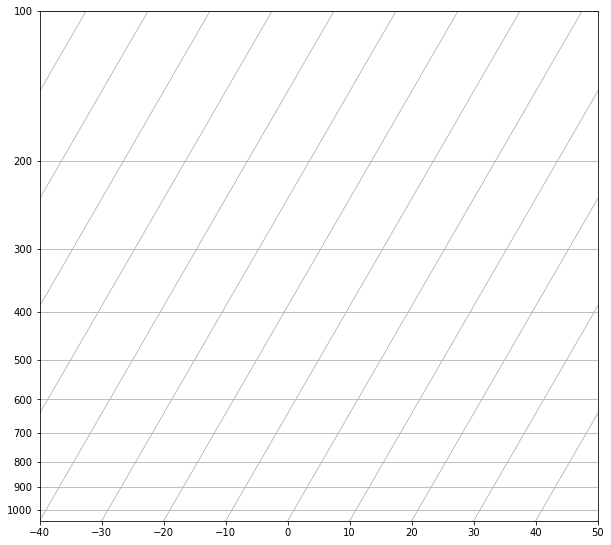

In [4]:
# Create a new figure. The dimensions here give a good aspect ratio
fig = plt.figure(figsize=(10, 10))
skew = SkewT(fig)

With our new `skew` object, we have access to many of our usual Matplotlib plotting methods,

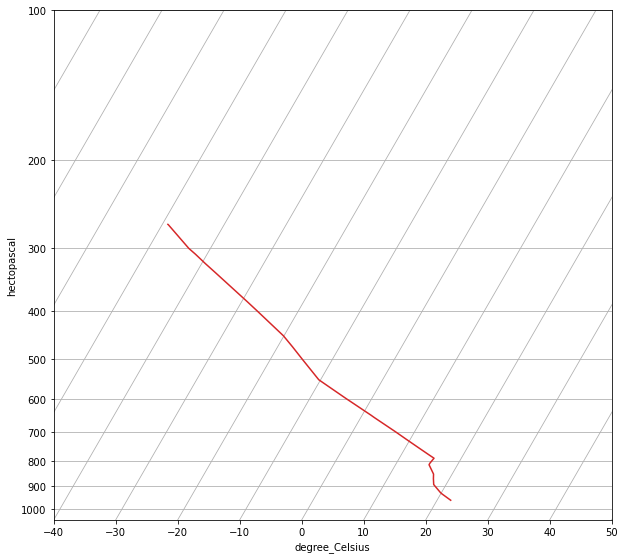

In [5]:
# Plot the data using normal plotting functions, all of the transforms
# happen in the background!
skew.plot(sounding['pressure'], sounding['temperature'], color='tab:red')

# Redisplay the figure
fig

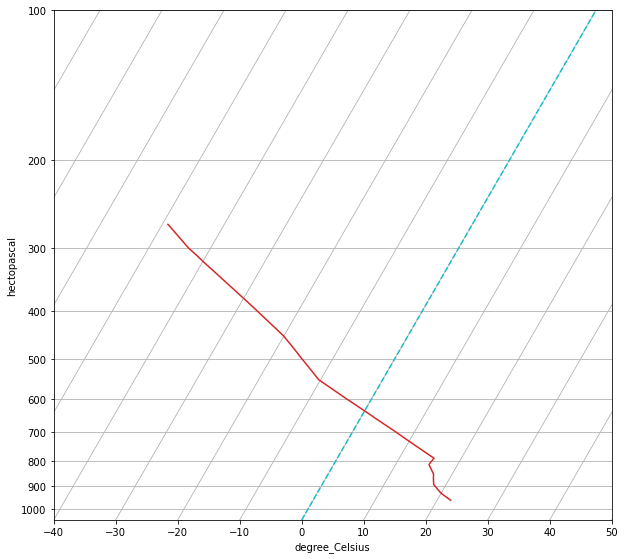

In [6]:
skew.ax.axvline(0 * units.degC, color='tab:cyan', linestyle='--')
# Check out skew.ax.axhline for lines of constant pressure!
# Useful for denoting important levels

fig

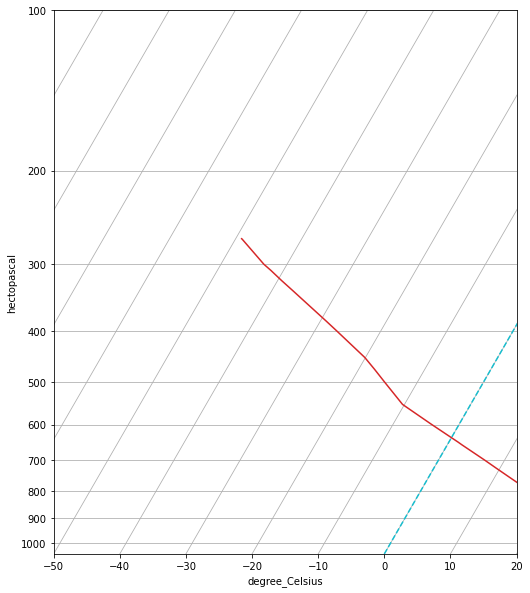

In [7]:
skew.ax.set_ylim(1050,100)
skew.ax.set_xlim(-50,20)

fig

as well as a few unique methods that MetPy provides to make a great Skew-T.

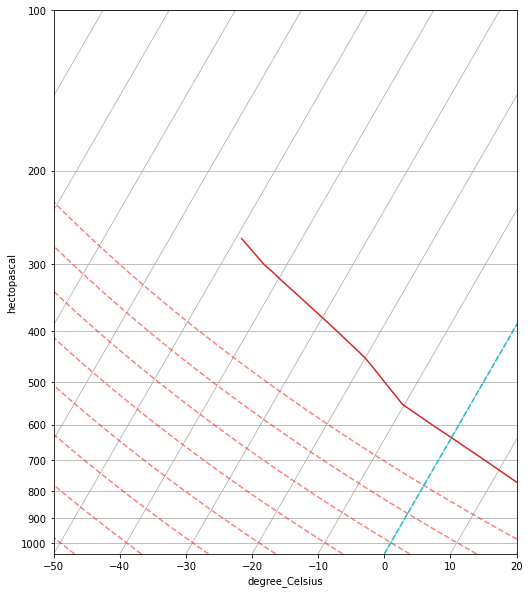

In [8]:
skew.plot_dry_adiabats()

fig

In [9]:
dir(skew)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_fig',
 'ax',
 'dry_adiabats',
 'mixing_lines',
 'moist_adiabats',
 'plot',
 'plot_barbs',
 'plot_dry_adiabats',
 'plot_mixing_lines',
 'plot_moist_adiabats',
 'shade_area',
 'shade_cape',
 'shade_cin']

(try the Tab key!)

---
## Calculate a new quantity

In [10]:
mpcalc.parcel_profile?

Signature: mpcalc.parcel_profile(pressure, temperature, dewpoint)
Docstring:
Calculate the profile a parcel takes through the atmosphere.

The parcel starts at `temperature`, and `dewpoint`, lifted up
dry adiabatically to the LCL, and then moist adiabatically from there.
`pressure` specifies the pressure levels for the profile.

Parameters
----------
pressure : `pint.Quantity`
    Atmospheric pressure level(s) of interest. This array must be from
    high to low pressure.

temperature : `pint.Quantity`
    Starting temperature

dewpoint : `pint.Quantity`
    Starting dewpoint

Returns
-------
`pint.Quantity`
    The parcel's temperatures at the specified pressure levels

See Also
--------
lcl, moist_lapse, dry_lapse, parcel_profile_with_lcl, parcel_profile_with_lcl_as_dataset

Notes
-----
Only functions on 1D profiles (not higher-dimension vertical cross sections or grids).
Duplicate pressure levels return duplicate parcel temperatures. Consider preprocessing
low-precision, high freque

In [11]:
sounding['profile'] = mpcalc.parcel_profile(sounding['pressure'],
                                            sounding['temperature'][0],
                                            sounding['dewpoint'][0])

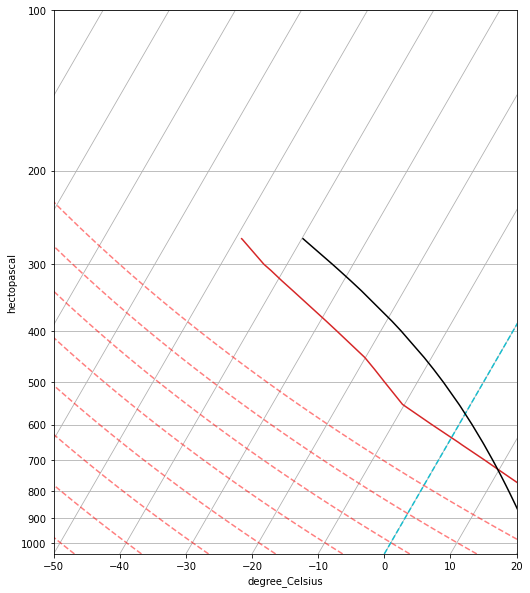

In [12]:
skew.plot(sounding['pressure'], sounding['profile'], color='black')

fig

---
## Visualizing CAPE

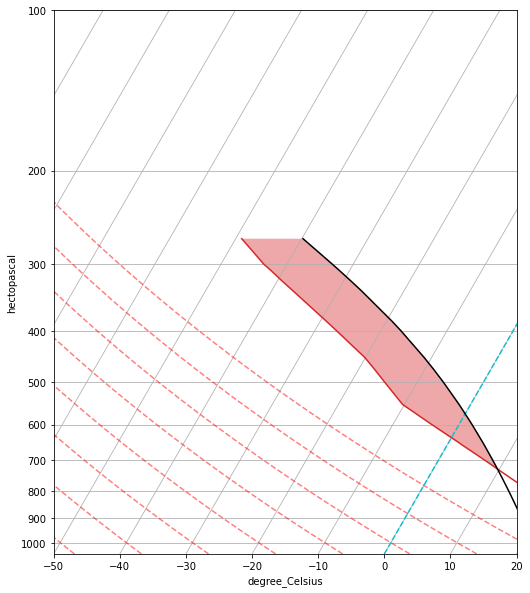

In [13]:
skew.shade_cape(sounding['pressure'], sounding['temperature'], sounding['profile'])

fig

<div class="alert alert-success">
    Reminder, <b><a href="https://unidata.github.io/MetPy/latest/api/generated/metpy.plots.SkewT.html">here</a></b> is the MetPy <code>SkewT</code> documentation!
    <br><br>
    <b>EXERCISE</b>: Working with our existing SkewT
     <ol>
         <li>Plot the <code>dewpoint</code> quantity from our <code>sounding</code> in green.</li>
         <li>Plot moist adiabats and mixing ratio lines in the background using sensible defaults.</li>
         <li>Our profile got awfully cut off! Alter our plot x- and y-limits to something more sensible.</li>
         <li>Shade any CIN present in our profile.</li>
    </ol>
    <br>
    <b>BONUS</b>:
    <ul>
        <li>Use the <code>u_wind</code> and <code>v_wind</code> quantities within our sounding to <code>plot_barbs</code> along our Skew-T.</li>
        <li>You have everything you need to perform some brand new calculations! Pick out some <a href="https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.html#soundings">sounding calculations</a> from the documentation and share your results. Put some numbers to your shaded CAPE and CIN or calculate valuable levels like LCL or EL and plot lines on our Skew-T to highlight them.</li>
    <li>Finally, create a brand new Skew-T from a brand new date and time, or even a new station from a station ID as shown <a href="https://weather.uwyo.edu/upperair/sounding.html">here</a>.</li>
    </ul>
</div>

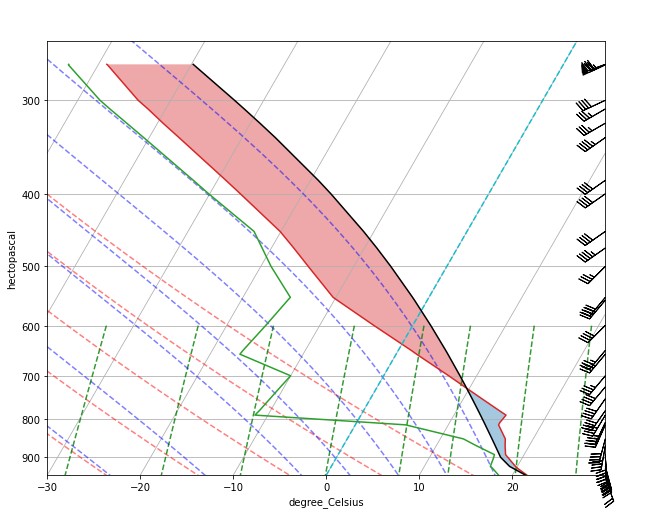

In [14]:
skew.plot(sounding['pressure'], sounding['dewpoint'], color='tab:green')

skew.plot_mixing_lines()
skew.plot_moist_adiabats()

skew.ax.set_xlim(-30, 30)
skew.ax.set_ylim(950, 250)

skew.shade_cin(sounding['pressure'], sounding['temperature'], sounding['profile'])

skew.plot_barbs(sounding['pressure'], sounding['u_wind'], sounding['v_wind'])

fig

In [15]:
cape, cin = mpcalc.cape_cin(sounding['pressure'],
                            sounding['temperature'],
                            sounding['dewpoint'],
                            sounding['profile'])

cape, cin

(2329.4548234555755 <Unit('joule / kilogram')>,
 -92.32207524951897 <Unit('joule / kilogram')>)

In [16]:
lcl_pressure, lcl_temperature = mpcalc.lcl(sounding['pressure'][0],
                                           sounding['temperature'][0],
                                           sounding['dewpoint'][0])

lfc_pressure, lfc_temperature = mpcalc.lfc(sounding['pressure'],
                                           sounding['temperature'],
                                           sounding['dewpoint'])

el_pressure, el_temperature = mpcalc.el(sounding['pressure'],
                                        sounding['temperature'],
                                        sounding['dewpoint'])

lcl_pressure, lfc_pressure, el_pressure

(914.8213254198571 <Unit('hectopascal')>,
 727.3714111316563 <Unit('hectopascal')>,
 nan <Unit('hectopascal')>)